# LOGISTIC REGRESSION - HEART DESEASE PREDICTION

**Introduction:**

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression

**Data Preparation**

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Demographic:**

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”




          




In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
#Importing data set
data=pd.read_csv('Heart Disease Data.csv')
data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
data.shape

(4238, 16)

In [5]:
# Renaming the variable 'male' into 'gender'
data=data.rename(columns={'male':'gender'})
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

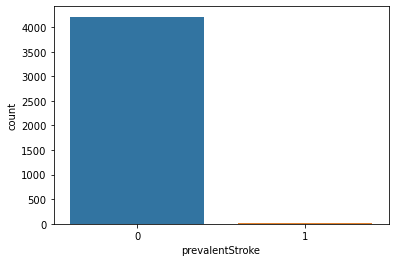

In [6]:
#plotting the graph
sns.countplot(x='prevalentStroke',data=data) # arond 4000 people getting prevalent stroke


<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

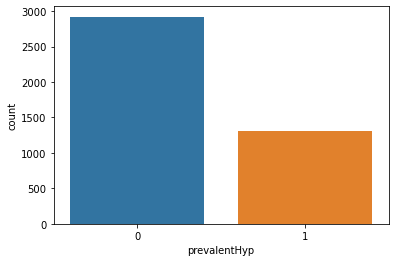

In [7]:
sns.countplot(x='prevalentHyp',data=data)

<AxesSubplot:ylabel='Frequency'>

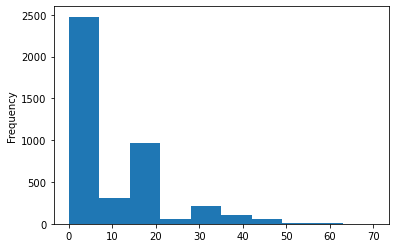

In [8]:
data['cigsPerDay'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

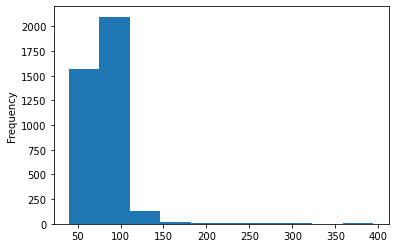

In [9]:
data['glucose'].plot.hist()

In [10]:
#droping the values
data.drop('education',axis=1,inplace=True)
data

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [11]:
#finding null vales
data.isnull().sum()

gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

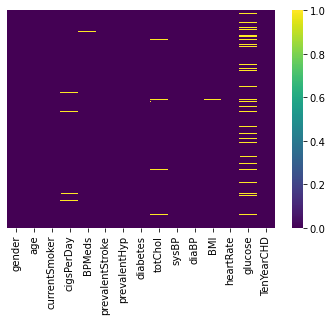

In [12]:
#plot the heatmap
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

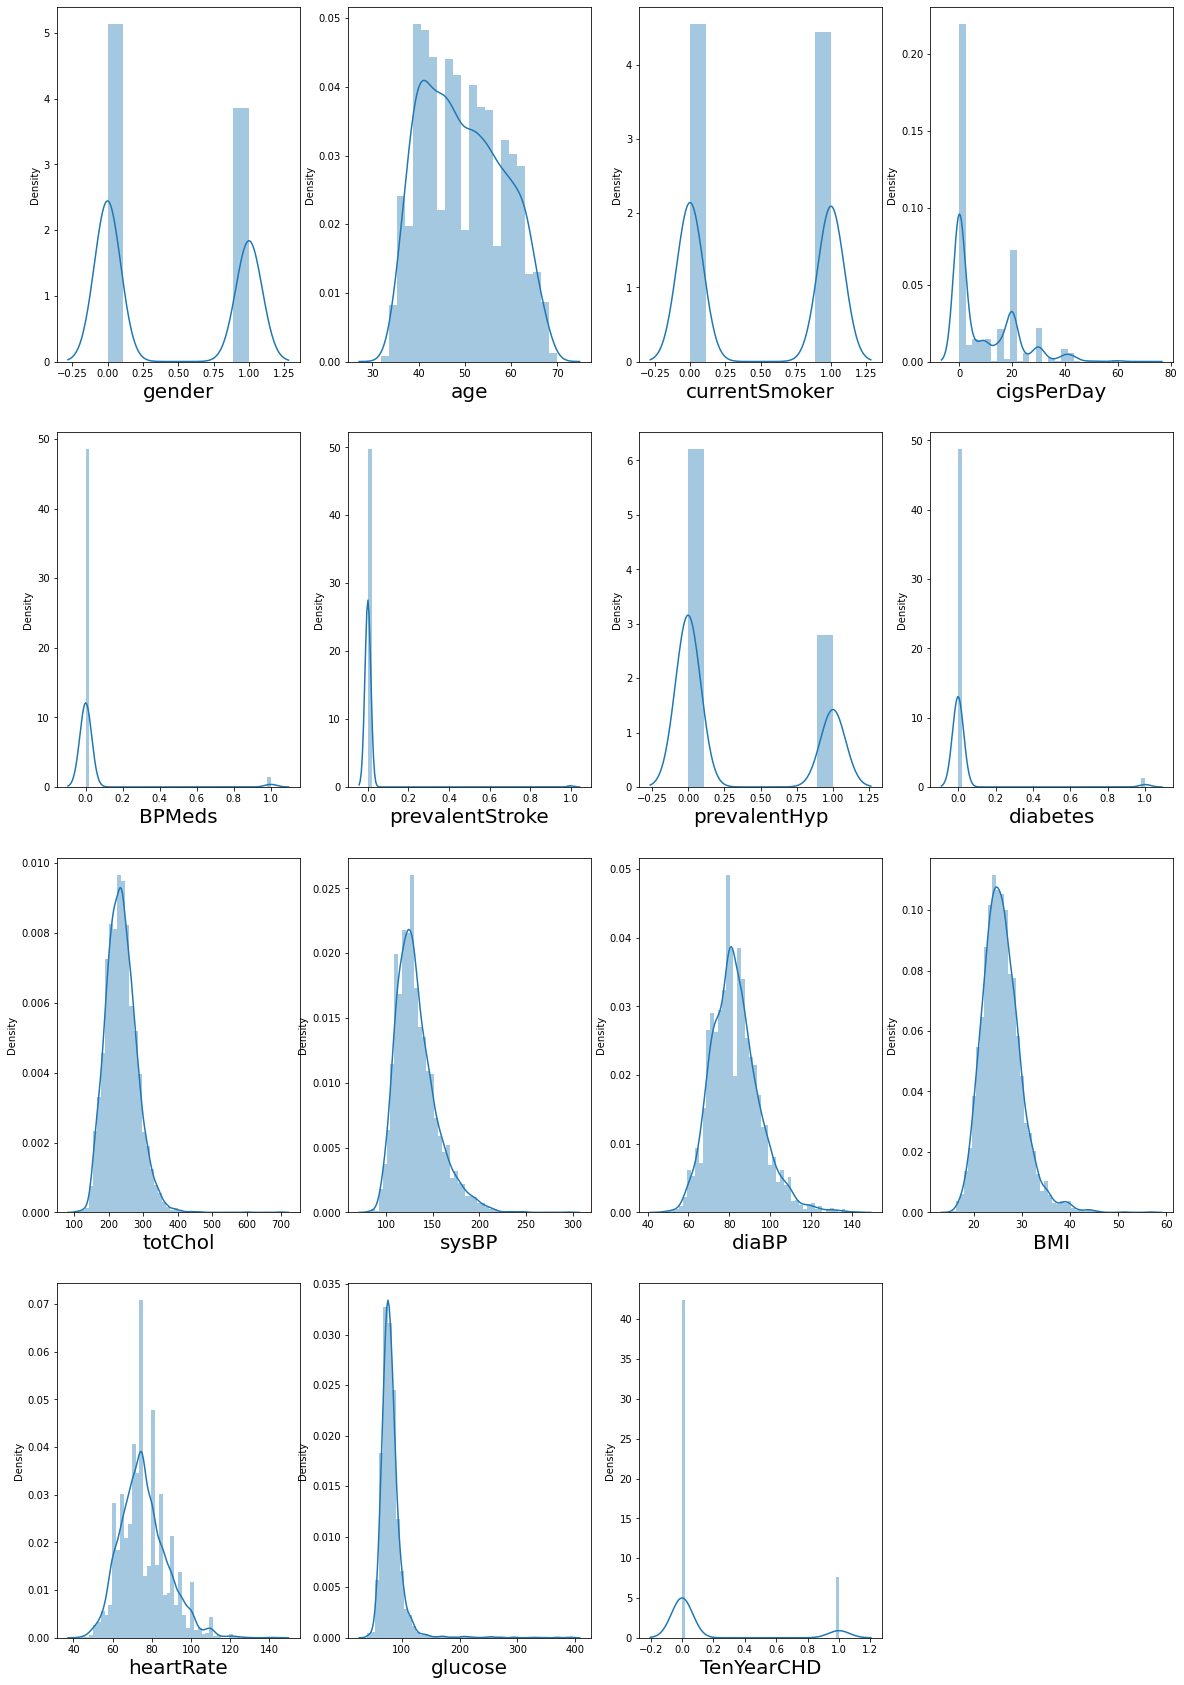

In [13]:
#Plotting distribution of each plot
plt.figure(figsize=(20,30),facecolor='white')
i=1

for column in data:
    if i<=15:
            ax=plt.subplot(4,4,i)
            sns.distplot(data[column])
            plt.xlabel(column,fontsize=20)
            
    i+=1
plt.show()

    

    


In [14]:
#null value treatment
data.cigsPerDay=data.cigsPerDay.fillna(data.cigsPerDay.mean())
data.BPMeds=data.BPMeds.fillna(data.BPMeds.mean())
data.totChol=data.totChol.fillna(data.totChol.mean())
data.BMI=data.BMI.fillna(data.BMI.mean())
data.heartRate=data.heartRate.fillna(data.heartRate.mean())
data.glucose=data.glucose.fillna(data.glucose.mean())


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


<AxesSubplot:>

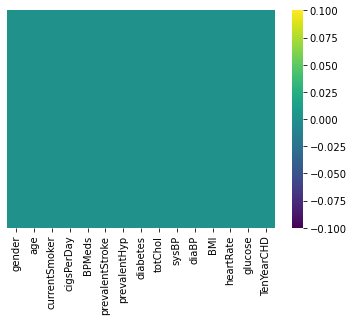

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

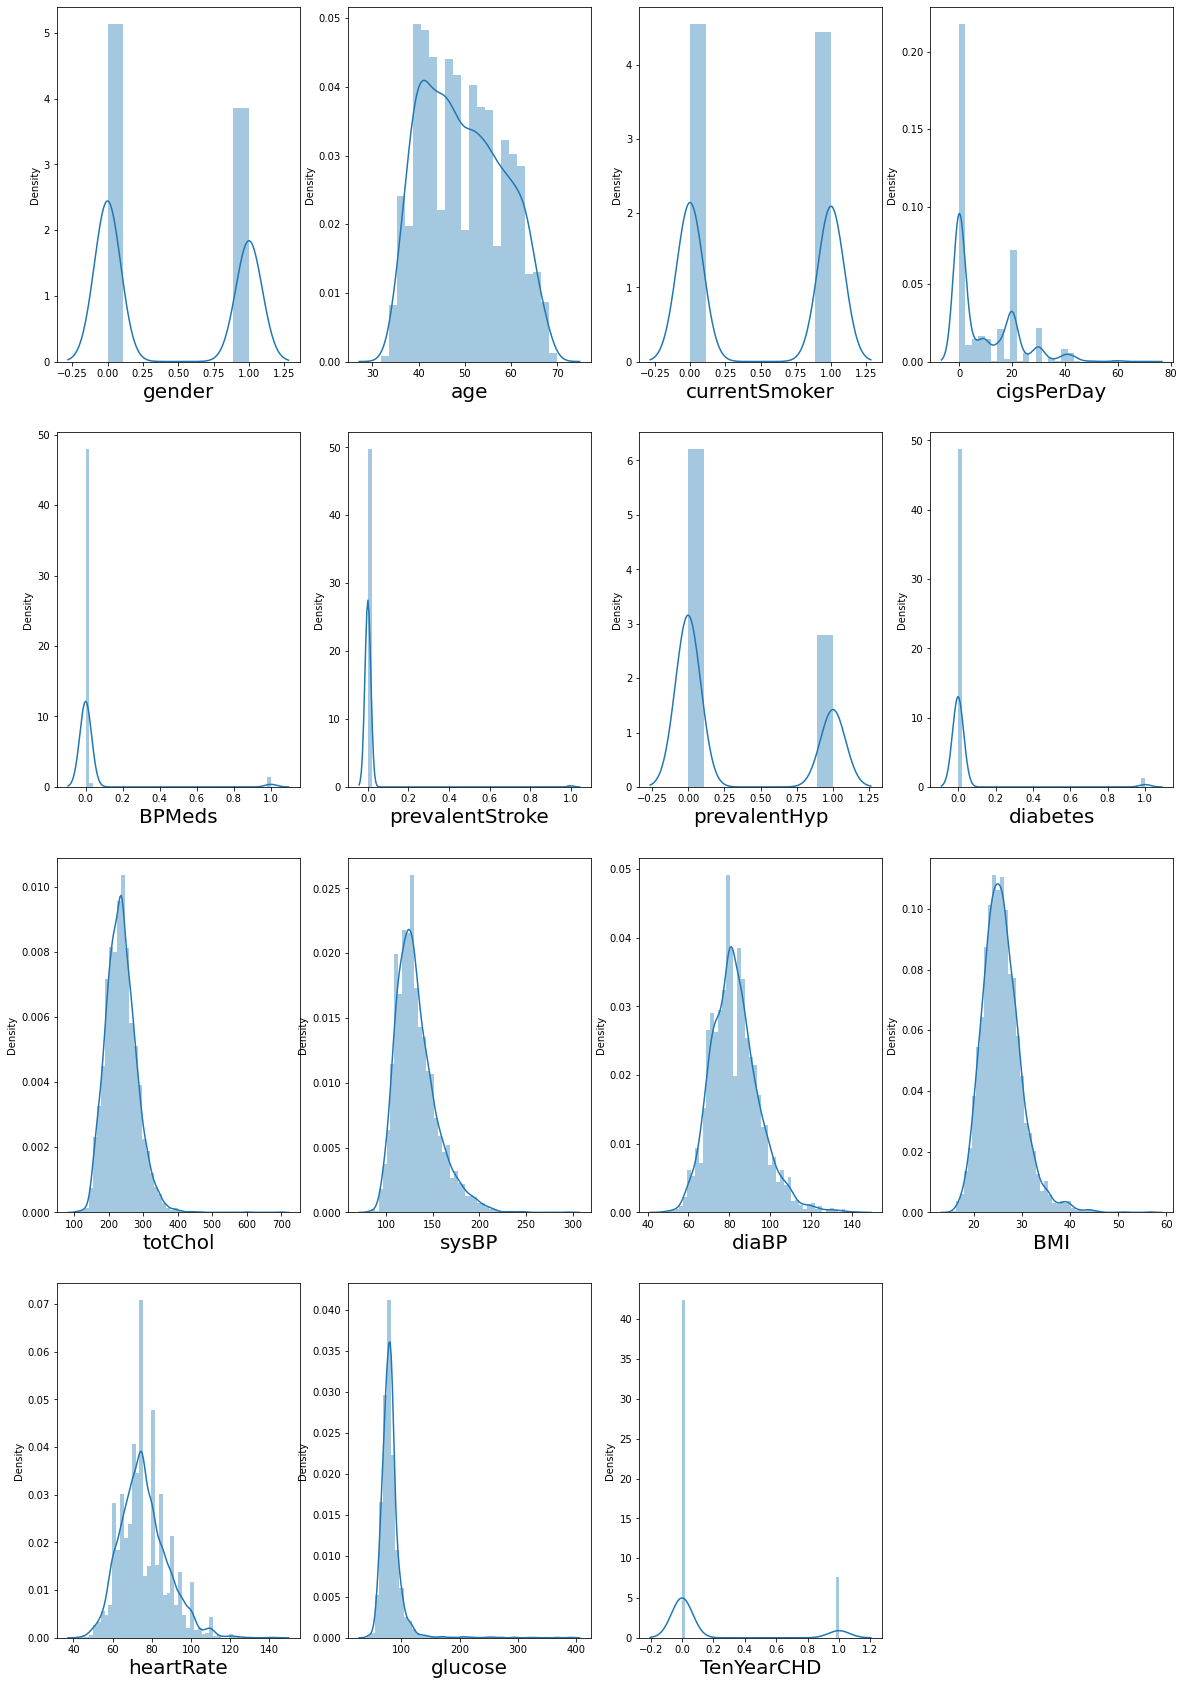

In [17]:
#Plotting distribution of each plot
plt.figure(figsize=(20,30),facecolor='white')
i=1

for column in data:
    if i<=15:
            ax=plt.subplot(4,4,i)
            sns.distplot(data[column])
            plt.xlabel(column,fontsize=20)
            
    i+=1
plt.show()

In [18]:
x=data.drop(columns=['TenYearCHD'])
y=data['TenYearCHD']

In [19]:
#correlation between the variable
data.corr()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.028979,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,-0.035989,0.394302,-0.130230,-0.088505,0.252047,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429


<AxesSubplot:>

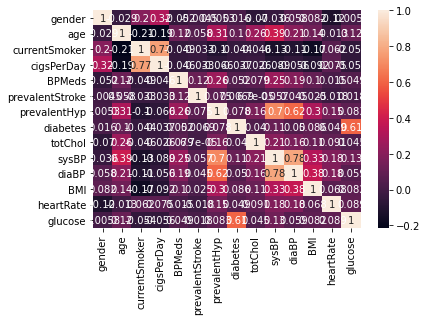

In [20]:
sns.heatmap(x.corr(),annot=True)

In [21]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)


In [22]:
#spliting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 355)

In [23]:
from sklearn.linear_model  import  LogisticRegression

In [24]:
#logistic regression
log_reg = LogisticRegression()

In [25]:
#fitting logistic regression
log_reg.fit(x_train,y_train)

LogisticRegression()

In [35]:
#predicting y variable
y_pred = log_reg.predict(x_test);y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
#accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8603773584905661

In [28]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[900,   3],
       [145,  12]], dtype=int64)

In [29]:
#assign the name to the confusion matrix
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [30]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8603773584905661

In [31]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9966777408637874

In [32]:
Recall = true_positive/(true_positive+false_negative) #Recall
Recall


0.861244019138756

In [33]:
f1=2*((Precision * Recall )) /(Precision + Recall)  #f score value
f1

0.9240246406570843